In [48]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

In [49]:
#create m * n matrix
a_1 = np.random.randint(1, 3, (5, 3))
a_2 = np.random.randint(1, 3, (3, 7))

A = a_1 @ a_2 + 0.1*np.random.randn(5, 7) #create matrix + add noise
A

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

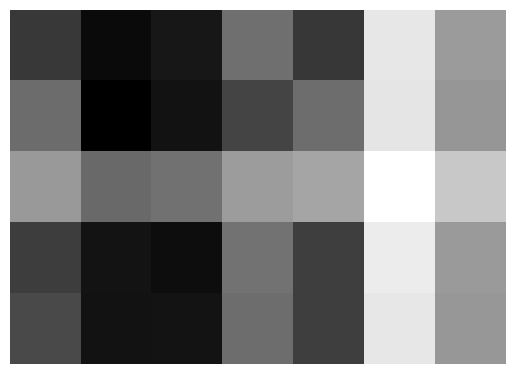

In [50]:
plt.imshow(A, cmap = "Greys")
a = plt.gca().axis("off")

In [51]:
U, sigma, V = np.linalg.svd(A)

In [52]:
# create the D matrix in the SVD
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:min(A.shape),:min(A.shape)] = np.diag(sigma)        # singular values on the main diagonal

In [61]:
np.argmax(sigma > 0.4)

0

In [59]:
sigma

array([47.92787806,  1.59525638,  0.35772778,  0.23426796,  0.15684841])

In [63]:
sigma.size - np.searchsorted(sigma[::-1], 0.4, side = "right")

2

In [245]:
U @ D @ V # == A up to numerical precision

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

In [246]:
k = 8
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]

In [247]:
A_ = U_ @ D_ @ V_

In [252]:
print(int(A.shape[0]* A.shape[1])/(A_.shape[0]*k + k + k*A_.shape[1]))


8 == int((A.shape[0]* A.shape[1]) / (0.33653846153846156 * (A.shape[0]+A.shape[1]+1)))


0.33653846153846156


True

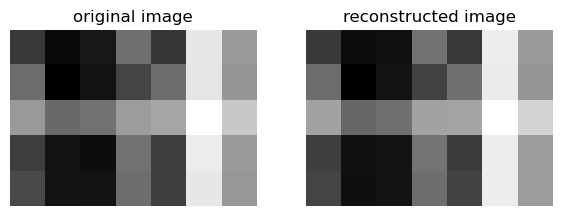

In [177]:
def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

compare_images(A, A_)

In [44]:
#The pictures will be our matrix